<a href="https://colab.research.google.com/github/Fortune-Adekogbe/100-pandas-puzzles/blob/master/code/VisualPlagiarism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/Projects/VisualPlagiarism

/content/drive/MyDrive/Projects/VisualPlagiarism


## Setup

In [ ]:
image_folder = "Plagiarised images 1"

In [ ]:
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
import os
import json
import time
from datetime import date
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data/Plagiarised Images UI - Sheet1.csv")
df

S/N                                            Image 1  \
0     1  WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8...   
1     2                            IMG-20240613-WA0039.jpg   
2     3                            IMG-20240613-WA0038.jpg   
3     4                            IMG-20240613-WA0060.jpg   
4     5                            IMG-20240613-WA0057.jpg   
5     6                            IMG-20240613-WA0077.jpg   
6     7                            IMG-20240613-WA0047.jpg   
7     8                            IMG-20240613-WA0031.jpg   
8     9                            IMG-20240613-WA0032.jpg   
9    10                            IMG-20240613-WA0063.jpg   
10   11                            IMG-20240613-WA0066.jpg   
11   12                            IMG-20240613-WA0034.jpg   
12   13                            IMG-20240613-WA0043.jpg   
13   14                            IMG-20240613-WA0071.jpg   
14   15                            IMG-20240613-WA0055.jpg   
15   16                            IMG-20240613-WA0077.jpg   
16   17                            IMG-20240613-WA0059.jpg   
17   18                            IMG-20240613-WA0052.jpg   
18   19                            IMG-20240613-WA0046.jpg   
19   20                            IMG-20240613-WA0040.jpg   
20   21  WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d...   

                                              Image 2  
0   WhatsApp Image 2024-06-10 at 17.38.33_a73f36a3...  
1                             IMG-20240613-WA0037.jpg  
2                             IMG-20240613-WA0061.jpg  
3                             IMG-20240613-WA0058.jpg  
4                             IMG-20240613-WA0073.jpg  
5                             IMG-20240613-WA0045.jpg  
6                             IMG-20240613-WA0033.jpg  
7                             IMG-20240613-WA0041.jpg  
8                             IMG-20240613-WA0053.jpg  
9                             IMG-20240613-WA0064.jpg  
10                            IMG-20240613-WA0049.jpg  
11                            IMG-20240613-WA0044.jpg  
12                            IMG-20240613-WA0069.jpg  
13                            IMG-20240613-WA0051.jpg  
14                            IMG-20240613-WA0075.jpg  
15                            IMG-20240613-WA0056.jpg  
16                            IMG-20240613-WA0054.jpg  
17                            IMG-20240613-WA0068.jpg  
18                            IMG-20240613-WA0042.jpg  
19                            IMG-20240613-WA0072.jpg  
20  WhatsApp Image 2024-06-13 at 13.13.15_88778c53...

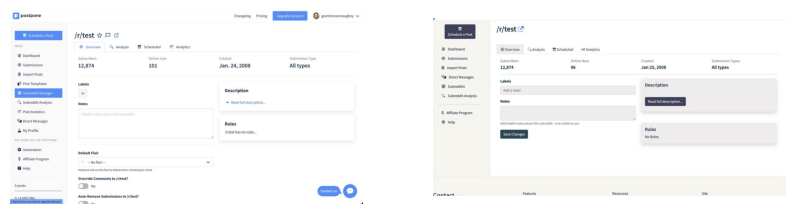

In [ ]:
i = 3
plt.subplots(1,2, figsize=(10,5))
plt.subplot(1,2,1)
image = Image.open(f"data/{image_folder}/{df['Image 1'][i]}")
plt.imshow(image)
plt.axis('off')
plt.subplot(1,2,2)
image = Image.open(f"data/{image_folder}/{df['Image 2'][i]}")
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
from PIL import Image

def split_image_into_squares(image_path, overlap_ratio=0.25):
    with Image.open(image_path) as img:
        width, height = img.size
        square_side = min(width, height)
        step_size = int(square_side * (1 - overlap_ratio))  # Step size adjusted for overlap

        squares = []
        if width > height:
            # Process width for overlaps
            for start in range(0, width - square_side + 1, step_size):
                square = img.crop((start, 0, start + square_side, height))
                squares.append(square)
            # Add the last piece if needed
            if start + square_side < width:
                square = img.crop((width - square_side, 0, width, height))
                squares.append(square)
        else:
            # Process height for overlaps
            for start in range(0, height - square_side + 1, step_size):
                square = img.crop((0, start, width, start + square_side))
                squares.append(square)
            # Add the last piece if needed
            if start + square_side < height:
                square = img.crop((0, height - square_side, width, height))
                squares.append(square)

        return squares

def resize_image_to_square(image_path):
    with Image.open(image_path) as img:
        square_side = min(img.size)
        new_img = img.resize((square_side, square_side))
        return new_img

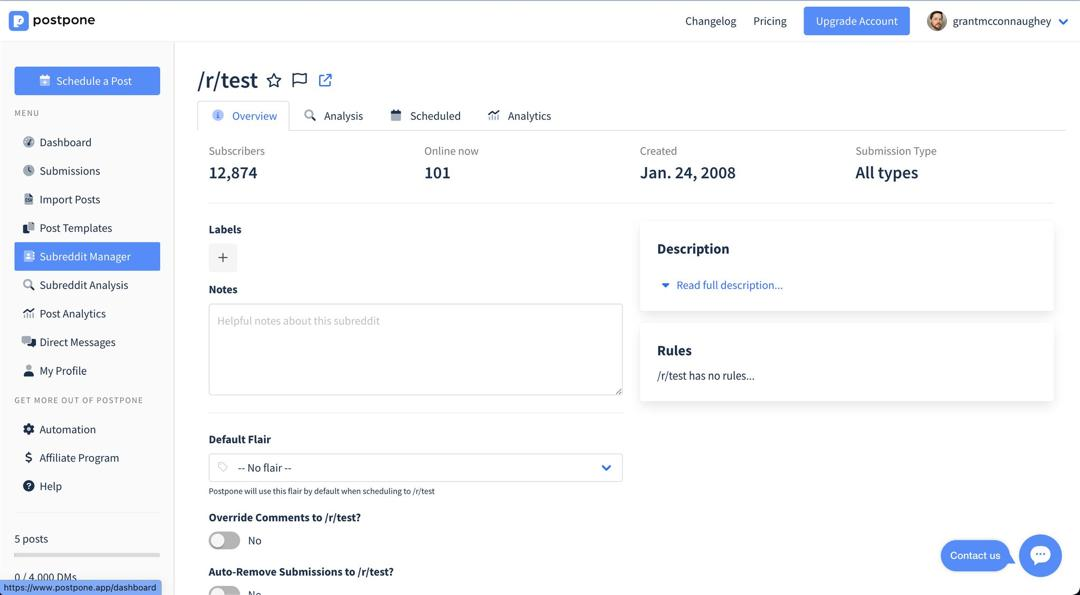

In [ ]:
image = Image.open(f"data/{image_folder}/{df['Image 1'][i]}")
image

In [ ]:
# Example usage:
image_path = f"data/{image_folder}/{df['Image 1'][i]}"
squares = split_image_into_squares(image_path)
for idx, square in enumerate(squares):
    square.show()

resized_square_image = resize_image_to_square(image_path)
resized_square_image.show()

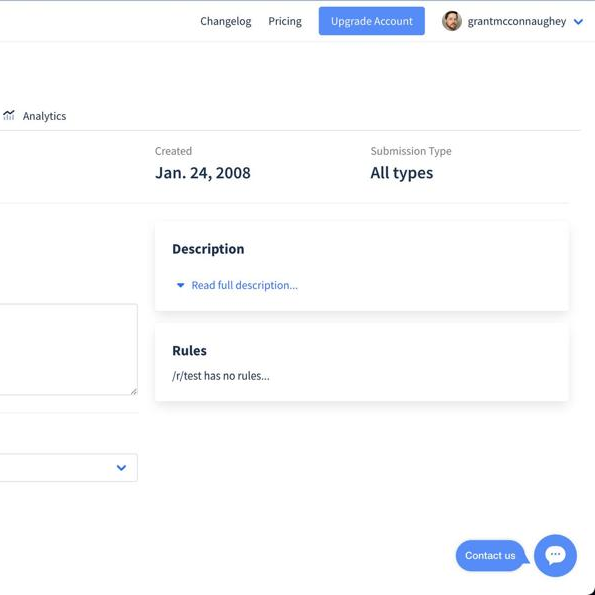

In [ ]:
squares[2]

In [ ]:
evaluation_images = df["Image 1"].tolist()
evaluation_images.extend(df["Image 2"].tolist())

# Embedding Extraction

## CLIP

In [ ]:
filename = "data/CLIP/eval_embeddings.json"

In [ ]:
try:
    import clip
except:
    !pip install git+https://github.com/openai/CLIP.git -q
    import clip

import torch
from PIL import Image
from urllib.request import urlopen, HTTPError

Image.MAX_IMAGE_PIXELS = 500000000 # 500 million pixels

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 14.4 MB/s eta 0:00:00


In [ ]:
# Load the CLIP model and the preprocess function
model, preprocess = clip.load('ViT-L/14@336px', device='cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

100%|███████████████████████████████████████| 891M/891M [01:06<00:00, 14.0MiB/s]


#### With Multiprocessing

In [ ]:
import multiprocessing
import pandas as pd
from tqdm.notebook import tqdm
from PIL import Image
from io import BytesIO
from urllib.request import urlopen
import torch
import os

def get_embeddings(image_url):
    if image_url in SEEN:
        return image_url, None
    try:
        # Download the image
        with urlopen(image_url) as response:
            # Create an Image object from the response
            image = Image.open(response)
        image_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

        # Move the tensor to the same device as the model
        image_tensor = image_tensor.to(device)

        # Forward pass through the model to get the image features
        with torch.no_grad():
            image_features = model.encode_image(image_tensor)

        # Normalize the image features
        image_features = image_features / image_features.norm(dim=-1, keepdim=True)
        return image_url, image_features
    except Exception as e:
        print(f"Error for {image_url}: {e}")
        return image_url, None

def save_results(results):
    data = []
    for url, image_features in results:
        if image_features is not None:
            data.append([url, image_features])
            SEEN.add(url)
    df.to_csv(filename, index=False, mode='a', header=False)

def process_urls(image_urls):
    results = []
    with multiprocessing.Pool(processes=10) as pool:
        for i, result in enumerate(tqdm(pool.imap(get_embeddings, image_urls), total=len(image_urls))):
            if result is not None:
                results.append(result)
            if (i + 1) % BATCH_SIZE == 0:
                save_results(results)
                results = []  # Clear results after saving
        # Save any remaining results
        if results:
            save_results(results)

# Usage in Jupyter Notebook
if __name__ == "__main__":
    BATCH_SIZE = 1000
    image_urls = dribbbles["IMAGE URL"].tolist()
    process_urls(image_urls)

  0%|          | 0/82978 [00:00<?, ?it/s]

Error for https://cdn.dribbble.com/userupload/13792884/file/original-38b15c9d38f75c3c6ac91e11567d7fd1.png: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/13810691/file/original-87fa0e6c5ca0ca923a1ad5d8813c8024.png: HTTP Error 403: ForbiddenError for https://cdn.dribbble.com/userupload/13828907/file/original-fea0e5be22d82d1886d322c009545be4.png: HTTP Error 403: Forbidden

Error for https://cdn.dribbble.com/userupload/13768422/file/original-044394cc087836794c2624522fa1acf9.jpg: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/13877005/file/original-38abe4a92041a96c33d248479abcff1b.png: HTTP Error 403: ForbiddenError for https://cdn.dribbble.com/userupload/13543850/file/original-2604b91cd6cf57a4e50825c84d839c82.png: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/13584254/file/original-24c5c456661d52c078e5e7b554946697.png: HTTP Error 403: Forbidden

Error for https://cdn.dribbble.com/userupload/13789189/file/original-

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Error for data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==: I/O operation on closed file.
Error for https://cdn.dribbble.com/userupload/12308066/file/original-3fe8316c41fbe5b16f2a6f52fddbf8b7.png: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/13241697/file/original-cae06dc4ee786276dd485b4a55276e84.png: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/13241695/file/original-018b8abb6c73ee86a18b8a0aa7644a84.jpg: HTTP Error 403: Forbidden


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Error for https://cdn.dribbble.com/userupload/14045280/file/original-e4f1d5db91cc91bd285c642b3cd99ff6.gif: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/13910584/file/original-88c7c67c6b2290995b8f07c0e70aadae.png: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/13910585/file/original-f915d095f1de85df6d6ed191968d1131.png: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/13740583/file/original-e90a0649ddddf4a8fb798e8d05efcb8d.png: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/13740582/file/original-ca022e02e521acc5294b5be748fa93be.png: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/13740584/file/original-4d5a449ee46d77251cd8ac3d2494628f.png: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/13840583/file/original-979b9115b599a8678898f87ab25191a9.jpg: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/13840584/file/original-

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Error for https://cdn.dribbble.com/userupload/12382341/file/original-821ba0d74ec9835eefe3e6895ce6de28.png: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/12621614/file/original-7df77d51015a6e494180413b1993d6b4.png: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/14103551/file/original-5b0938db607d670a483e7a208c3b8f61.png: HTTP Error 403: Forbidden


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Error for https://cdn.dribbble.com/userupload/13987301/file/original-c8656d625413f8c9e6d51f5551280ba8.jpg: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/13987302/file/original-b676358ca9cb794f7aeb811b4a7741f0.png: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/12584164/file/original-b4a27950e84470dce0307f276a86eb0e.png: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/12536481/file/original-91b848629ddd47dda4eca54216e13db5.jpg: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/12536482/file/original-fe2137f0b04aae00d840617a45079ebf.jpg: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/12599453/file/original-b4ea981d654ab5565eb7d0809f76d494.jpg: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/12599479/file/original-4a6656db817f4fa5702e1d63ac0d965b.jpg: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/14044934/file/original-

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Error for https://cdn.dribbble.com/userupload/14125898/file/original-cac99b4863fd1ca1745f0cc5f030b524.png: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/14125900/file/original-73e4beff6674c1d45647dc83c30e8f5b.png: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/14125896/file/original-b55b047570de0e4e1e9921d04d858ee2.png: HTTP Error 403: ForbiddenError for https://cdn.dribbble.com/userupload/14125897/file/original-6a018febdb392b879ff1e193f5461fda.png: HTTP Error 403: Forbidden

Error for https://cdn.dribbble.com/userupload/14125899/file/original-3e78fe331a3b504be08f13b962a2708d.jpg: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/14045315/file/original-cae47a335c409303cc735cc5bb6b619a.jpg: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/12647941/file/original-7c333c920afb86a177f213bcc53c276a.jpg: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/12627481/file/original-

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Error for https://cdn.dribbble.com/userupload/14084275/file/original-f7c87b032a2de23a1430e8ecc8615f70.png: HTTP Error 503: Service Not Available
Error for https://cdn.dribbble.com/userupload/13829363/file/original-7f39793a1fbf10d1f4b260c29e052ff8.png: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/13161192/file/original-5e8cf7c2c7f723a459e44210e394c607.jpg: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/13161193/file/original-cbd9a69afa00bcf2329c4a27005d0619.jpg: HTTP Error 403: ForbiddenError for https://cdn.dribbble.com/userupload/13161188/file/original-73be50a5a2ae28e0fd352614a758c490.jpg: HTTP Error 403: Forbidden

Error for https://cdn.dribbble.com/userupload/13161189/file/original-20b16bd6104c9d57311a7c5b1803b477.jpg: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/13161190/file/original-df0cf9dbb4a8e2c7ea701b30ba1ac999.jpg: HTTP Error 403: Forbidden
Error for https://cdn.dribbble.com/userupload/13275116/fi

#### Evaluation Data

In [ ]:
def get_embeddings(image):
    # Download the image
    data = []
    image_path = f"data/{image_folder}/{image}"
    for split, image_split in enumerate(split_image_into_squares(image_path), start=1):
        image_tensor = preprocess(image_split).unsqueeze(0)  # Add batch dimension

        # Move the tensor to the same device as the model
        image_tensor = image_tensor.to(device)

        # Forward pass through the model to get the image features
        with torch.no_grad():
            image_features = model.encode_image(image_tensor)

        # Move to CPU
        image_features = image_features.detach().cpu().numpy() # / image_features.norm(dim=-1, keepdim=True)

        data.append([image, split, image_features])
    return data

In [ ]:
all_data = []
for image in tqdm(evaluation_images):
    image_features = get_embeddings(image)
    df_ = pd.DataFrame(columns=["IMAGE", "SPLIT", "CLIP EMBEDDING"], data = image_features)
    data =  df_.to_json(orient="records")
    data = json.loads(data)
    all_data.extend(data)

# save to json
with open(filename, 'w') as f:
    json.dump(all_data, f)

  0%|          | 0/42 [00:00<?, ?it/s]

In [ ]:
with open(filename, 'r') as f:
    all_data = json.load(f)

### FAISS

In [ ]:
!pip install faiss-cpu -q # faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 40.9 MB/s eta 0:00:00


In [ ]:
import faiss

#### L2

In [ ]:
#Create Faiss index using FlatL2 type. 768 is the number of dimensions of each vectors
index = faiss.IndexFlatL2(768)
#Convert embeddings and add them to the index
for data in all_data:
    img_feature = data["CLIP EMBEDDING"]
    #Convert to float32 numpy
    vector = np.float32(img_feature)
    #Normalize vector: important to avoid wrong results when searching
    faiss.normalize_L2(vector)
    #Add to index
    index.add(vector)

#Store the index locally
faiss.write_index(index,"data/CLIP/faiss_l2_eval.index")

In [ ]:
index  = faiss.read_index("data/CLIP/faiss_l2_eval.index")

In [ ]:
from collections import defaultdict

def get_prediction(query_image, index, k, metric="L2"):
    """
    Returns k most similar images to a given query image.

    query_image: str = image path
    k: float = number of most similar images to return.
    """

    query_features = get_embeddings(query_image)

    #Preprocess the tensor
    query_vectors = []
    for i in query_features:
        query_vectors.extend(i[-1])
    query_vectors = np.array(query_vectors, dtype=np.float32)

    # normalize vector
    faiss.normalize_L2(query_vectors)


    #Search the top 5 images
    probs, indices = index.search(query_vectors, 15)

    # Convert distances to scores
    if metric == "L2":
        scores = 1 / (1 + probs)
    else:
        scores = probs

    # Aggregate scores for each unique image index
    aggregate_scores = defaultdict(lambda: [0.0, 0])  # Dictionary to store [total_score, count]

    for query_scores, query_indices in zip(scores, indices):
        for score, index in zip(query_scores, query_indices):
            aggregate_scores[index][0] += score  # Summing scores
            aggregate_scores[index][1] += 1      # Counting occurrences


    # Calculate average scores
    average_scores = {index: total_score / count for index, (total_score, count) in aggregate_scores.items()}


    # Sort results by average scores
    sorted_results = sorted(average_scores.items(), key=lambda x: x[1], reverse=True)


    # unique_results = []
    count = 0
    most_similar =  set()
    for i, _ in sorted_results:
        value = all_data[i]['IMAGE']
        if value not in most_similar:
            most_similar.add(value)
            count += 1
            # print(value, i)
            # unique_results.append((value, i))
        if count >= k:
            break
    return most_similar

In [ ]:
def evaluate(index, top_k=6, metric="L2"):
    result = {}
    score = 0
    count = 0
    for image, plag in tqdm(df.iloc[:, 1:3].values):
        preds = get_prediction(image, index, k=top_k, metric=metric)
        score += plag in preds
        result[image] = int(plag in preds)
        count += 1
    return score * 100 / count, result

In [ ]:
evaluate(index, top_k=11)

  0%|          | 0/21 [00:00<?, ?it/s]

(95.23809523809524,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

In [ ]:
evaluate(index)

  0%|          | 0/21 [00:00<?, ?it/s]

(95.23809523809524,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

In [ ]:
evaluate(index, top_k=4)

  0%|          | 0/21 [00:00<?, ?it/s]

(95.23809523809524,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

In [ ]:
evaluate(index, top_k=2)

  0%|          | 0/21 [00:00<?, ?it/s]

(90.47619047619048,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 0,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

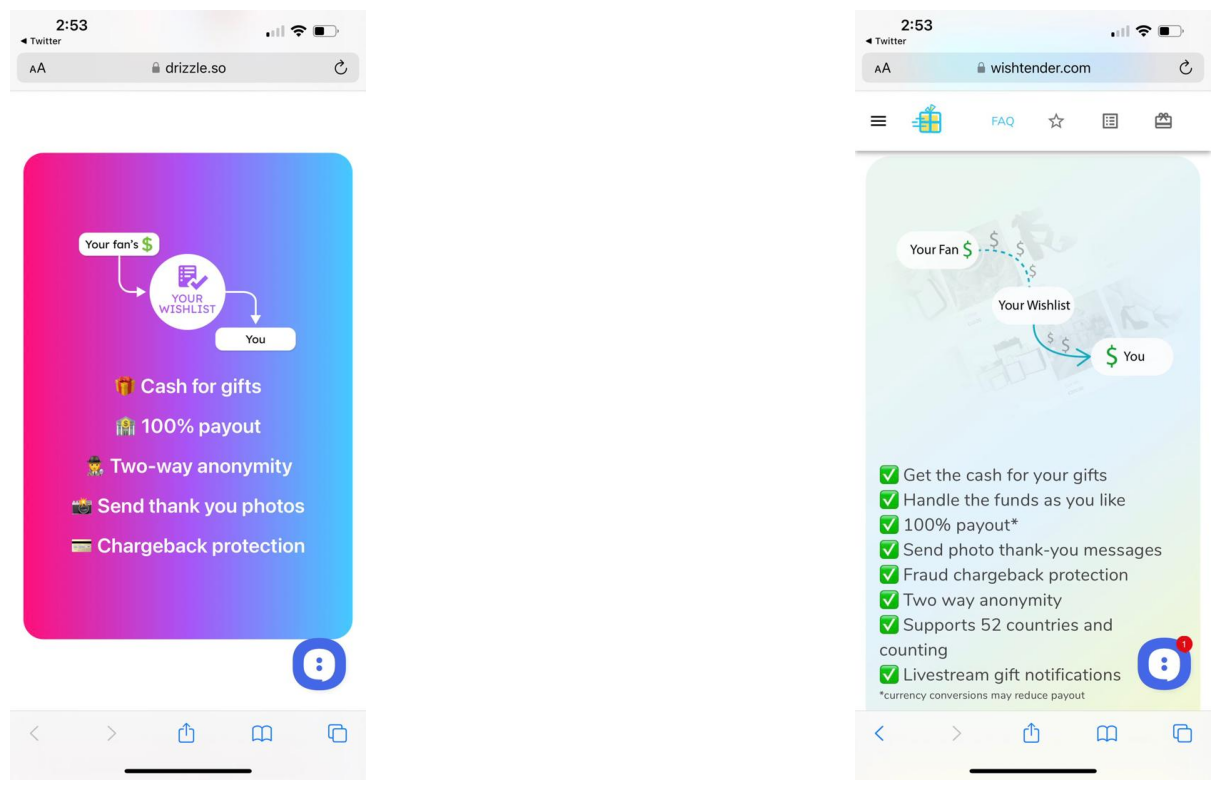

In [ ]:
plt.subplots(1,2, figsize=(20,10))
plt.subplot(1,2,1)
image = Image.open(f"data/{image_folder}/{query_image}")
plt.imshow(image)
plt.axis('off')
plt.subplot(1,2,2)
image = Image.open(f"data/{image_folder}/{all_data[87]['IMAGE']}")
plt.imshow(image)
plt.axis('off')
plt.show()

#### Cosine Similarity

In [ ]:
import faiss

# Normalize feature vectors
def normalize(vectors):
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    return vectors / norms

#Create Faiss index using FlatL2 type. 512 is the number of dimensions of each vectors
index = faiss.IndexFlatIP(768)
#Convert embeddings and add them to the index
for data in all_data:
    img_feature = data["CLIP EMBEDDING"]
    #Convert to float32 numpy
    vector = np.float32(img_feature)
    # normalize vector
    faiss.normalize_L2(vector)
    #Add to index
    index.add(vector)

#Store the index locally
faiss.write_index(index,"data/CLIP/faiss_cs_eval.index")

In [ ]:
index  = faiss.read_index("data/CLIP/faiss_cs_eval.index")

In [ ]:
evaluate(index, metric="CS")

  0%|          | 0/21 [00:00<?, ?it/s]

(95.23809523809524,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

In [ ]:
evaluate(index, metric="CS", top_k=4)

  0%|          | 0/21 [00:00<?, ?it/s]

(95.23809523809524,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

In [ ]:
evaluate(index, metric="CS", top_k=2)

  0%|          | 0/21 [00:00<?, ?it/s]

(90.47619047619048,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 0,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

In [ ]:
evaluation_images[16]

'IMG-20240613-WA0059.jpg'

In [ ]:
#Tokenize the query image to search using CLIP
query_image = evaluation_images[16]
query_features = get_embeddings(query_image)
# Preprocess the tensor
query_vectors = []
for i in query_features:
    # query_vector = np.float32(i[-1])
    query_vectors.extend(i[-1])
query_vectors = np.array(query_vectors, dtype=np.float32)

faiss.normalize_L2(query_vectors)

#Search the top 5 images
distance, indices = index.search(query_vectors, 15, )

print('probs',distance)
print('indice' ,indices)

# Convert distances to scores
scores = distance

# Aggregate scores for each unique image index
aggregate_scores = defaultdict(lambda: [0.0, 0])  # Dictionary to store [total_score, count]

for query_scores, query_indices in zip(scores, indices):
    for score, i in zip(query_scores, query_indices):
        aggregate_scores[i][0] += score  # Summing scores
        aggregate_scores[i][1] += 1      # Counting occurrences

# Calculate average scores
average_scores = {i: total_score / count for i, (total_score, count) in aggregate_scores.items()}

# Sort results by average scores
sorted_results = sorted(average_scores.items(), key=lambda x: x[1], reverse=True)

# Output the sorted results
print(sorted_results)

probs [[1.         0.92836416 0.7793578  0.7204968  0.71333337 0.6764782
  0.6582178  0.65594685 0.65259737 0.6209564  0.61868894 0.6113285
  0.608092   0.60741735 0.6069243 ]
 [1.         0.92836416 0.7793578  0.7204968  0.71333337 0.6764782
  0.6582178  0.65594685 0.65259737 0.6209564  0.61868894 0.6113285
  0.608092   0.60741735 0.6069243 ]
 [1.         0.92836416 0.7793578  0.7204968  0.71333337 0.6764782
  0.6582178  0.65594685 0.65259737 0.6209564  0.61868894 0.6113285
  0.608092   0.60741735 0.6069243 ]]
indice [[ 45  44  43 100  99  57   7   1  98  22   6   9  73  77  27]
 [ 45  44  43 100  99  57   7   1  98  22   6   9  73  77  27]
 [ 45  44  43 100  99  57   7   1  98  22   6   9  73  77  27]]


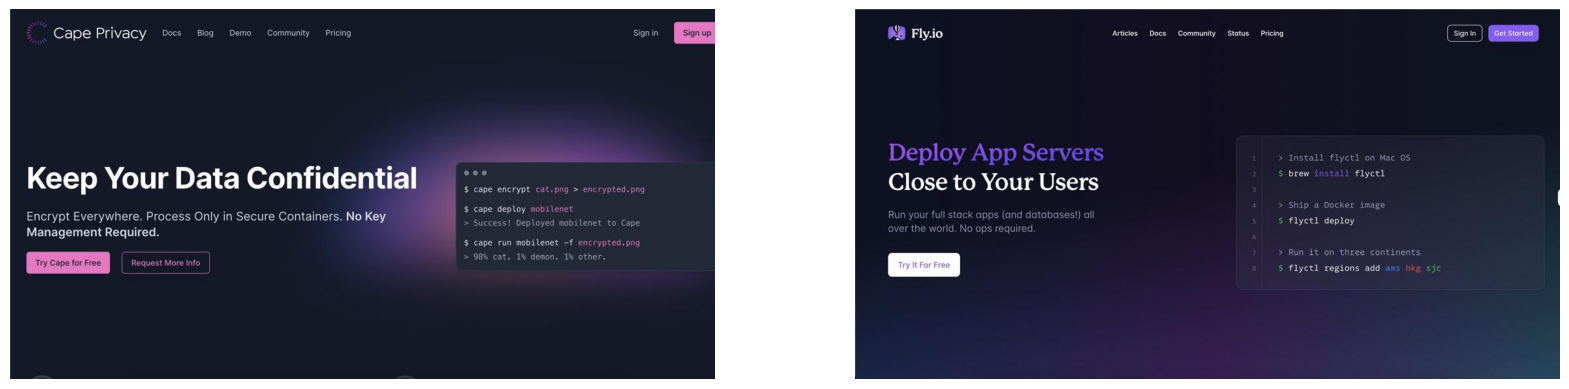

In [ ]:
plt.subplots(1,2, figsize=(20,10))
plt.subplot(1,2,1)
image = Image.open(f"data/{image_folder}/{query_image}")
plt.imshow(image)
plt.axis('off')
plt.subplot(1,2,2)
image = Image.open(f"data/{image_folder}/{all_data[100]['IMAGE']}")
plt.imshow(image)
plt.axis('off')
plt.show()

#### Inner Product

In [ ]:
import faiss

#Create Faiss index using FlatL2 type. 768 is the number of dimensions of each vectors
index = faiss.IndexFlatIP(768)
#Convert embeddings and add them to the index
for data in all_data:
    img_feature = data["CLIP EMBEDDING"]
    #Convert to float32 numpy
    vector = np.float32(img_feature)
    #Add to index
    index.add(vector)

#Store the index locally
faiss.write_index(index,"data/CLIP/faiss_IP_eval.index")

In [ ]:
index  = faiss.read_index("data/CLIP/faiss_IP_eval.index")

In [ ]:
evaluate(index, metric="IP")

  0%|          | 0/21 [00:00<?, ?it/s]

(95.23809523809524,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

In [ ]:
evaluate(index, metric="IP", top_k=4)

  0%|          | 0/21 [00:00<?, ?it/s]

(95.23809523809524,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

In [ ]:
evaluate(index, metric="IP", top_k=2)

  0%|          | 0/21 [00:00<?, ?it/s]

(85.71428571428571,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 0,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 0,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

In [ ]:
#Tokenize the query image to search using CLIP
query_image = evaluation_images[12]
query_features = get_embeddings(query_image)
#Preprocess the tensor
query_vectors = []
for i in query_features:
    query_vectors.extend(i[-1])
query_vectors = np.float32(query_vectors)

#Search the top 5 images
distance, indices = index.search(query_vectors, 15)

print('probs',distance)
print('indice' ,indices)

probs [[284.4     219.78178 208.54263 207.8171  200.72545 199.51376 186.79393
  178.74292 173.57649 170.86752 169.23026 166.69397 165.1304  164.60046
  164.53555]
 [276.58813 241.0603  229.6568  223.97322 208.70715 201.63017 193.82959
  186.8287  186.79393 185.49997 185.06293 183.64299 176.11497 175.36505
  173.36807]
 [269.80283 241.0603  224.73914 206.11258 200.80545 196.8411  181.45015
  180.99463 180.76471 173.37463 172.0766  168.27643 166.7703  165.95277
  165.72546]]
indice [[31 34 86 36 35 91 32 90 88 87 89 85 63 33  4]
 [32 33 87 88 35 36 91 86 31  5  4 90 58 89 59]
 [33 32 88 87 35 36 91  4  5 59 58 57 73  1 85]]


In [ ]:
import numpy as np

# Convert distances to scores
scores = distance

# Aggregate scores for each unique image index
from collections import defaultdict
aggregate_scores = defaultdict(float)

for query_scores, query_indices in zip(scores, indices):
    for score, index in zip(query_scores, query_indices):
        aggregate_scores[index] += score  # Summing scores for simplicity

# Sort results by aggregated scores
sorted_results = sorted(aggregate_scores.items(), key=lambda x: x[1], reverse=True)

unique_results = []
SEEN=  set()
for index, _ in sorted_results:
    value = all_data[index]['IMAGE']
    if value not in SEEN:
        SEEN.add(value)
        print(value, index)
        unique_results.append((value, index))

IMG-20240613-WA0043.jpg 32
IMG-20240613-WA0069.jpg 88
IMG-20240613-WA0071.jpg 35
IMG-20240613-WA0051.jpg 91
IMG-20240613-WA0039.jpg 4
WhatsApp Image 2024-06-10 at 17.38.33_a73f36a3.jpg 58
IMG-20240613-WA0037.jpg 59
IMG-20240613-WA0044.jpg 85
IMG-20240613-WA0033.jpg 73
WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg 1
IMG-20240613-WA0058.jpg 63


In [ ]:
# Aggregate scores for each unique image index
aggregate_scores = defaultdict(lambda: [0.0, 0])  # Dictionary to store [total_score, count]

for query_scores, query_indices in zip(scores, indices):
    for score, index in zip(query_scores, query_indices):
        aggregate_scores[index][0] += score  # Summing scores
        aggregate_scores[index][1] += 1      # Counting occurrences

# Calculate average scores
average_scores = {index: total_score / count for index, (total_score, count) in aggregate_scores.items()}

# Sort results by average scores
sorted_results = sorted(average_scores.items(), key=lambda x: x[1], reverse=True)

# Output the sorted results
print(sorted_results)

## MetaCLIP

In [ ]:
filename = "data/MetaCLIP/eval_embeddings.json"

In [ ]:
!pip install open_clip_torch -q

In [ ]:
import open_clip
import torch
from PIL import Image
from urllib.request import urlopen, HTTPError

Image.MAX_IMAGE_PIXELS = 500000000 # 500 million pixels

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model, _, preprocess = open_clip.create_model_and_transforms('ViT-H-14-quickgelu', pretrained='metaclip_fullcc', device=device)  # for 2.5B use 'metaclip_fullcc' in OpenCLIP or 'metaclip_2_5b' in this repo

In [ ]:
image = preprocess(Image.open("data/jpeg/0-10s-com--.jpeg")).unsqueeze(0).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    image_features = image_features.detach().cpu().numpy() # /= image_features.norm(dim=-1, keepdim=True)

In [ ]:
image_features.shape

#### Evaluation Data

In [ ]:
def get_meta_embeddings(image):
    # Download the image
    data = []
    image_path = f"data/{image_folder}/{image}"
    for split, image_split in enumerate(split_image_into_squares(image_path), start=1):
        image_tensor = preprocess(image_split).unsqueeze(0)  # Add batch dimension

        # Move the tensor to the same device as the model
        image_tensor = image_tensor.to(device)

        # Forward pass through the model to get the image features
        with torch.no_grad():
            image_features = model.encode_image(image_tensor)

        # Move to CPU
        image_features = image_features.detach().cpu().numpy() # / image_features.norm(dim=-1, keepdim=True)

        data.append([image, split, image_features])
    return data

In [ ]:
all_data = []
for image in tqdm(evaluation_images):
    image_features = get_meta_embeddings(image)
    df = pd.DataFrame(columns=["IMAGE", "SPLIT", "MetaCLIP EMBEDDING"], data = image_features)
    data =  df.to_json(orient="records")
    data = json.loads(data)
    all_data.extend(data)

# save to json
with open(filename, 'w') as f:
    json.dump(all_data, f)

### Load Embeddings

In [ ]:
with open(filename, 'r') as f:
    all_data = json.load(f)

In [ ]:
all_data

[{'IMAGE': 'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg',
  'SPLIT': 1,
  'MetaCLIP EMBEDDING': [[0.0644937456,
    -0.7185157537,
    -0.8260132074,
    0.5977298617,
    -0.2730047703,
    0.2959295511,
    0.1942351311,
    0.4581432939,
    0.7232034206,
    0.4718678594,
    -0.1721395552,
    0.5182663798,
    0.1676407754,
    -0.0488419607,
    0.1824693382,
    -0.1045383886,
    0.4360768795,
    0.242462635,
    0.6562384367,
    1.1055798531,
    -0.4827783108,
    0.664152503,
    -0.105659619,
    -0.0429979861,
    -0.1545706987,
    1.5111701488,
    -0.5656765103,
    0.0272845924,
    -0.8059850931,
    0.3552069366,
    -0.593138814,
    -0.2600955367,
    0.5272489786,
    -0.5380516052,
    -0.7272760868,
    0.1926111877,
    0.3243342936,
    1.3251683712,
    -0.8760616779,
    0.6811133623,
    -0.5522626042,
    0.6227635741,
    -0.1135937199,
    0.2937960625,
    -0.0355469882,
    -0.2971042991,
    -0.7050507665,
    0.4442855716,
    -0.7634705901

### FAISS

In [ ]:
!pip install faiss-cpu -q # faiss-gpu

#### L2

In [ ]:
import faiss

In [ ]:
dim = 1024
#Create Faiss index using FlatL2 type. 512 is the number of dimensions of each vectors
index = faiss.IndexFlatL2(dim)
#Convert embeddings and add them to the index
for data in all_data:
    img_feature = data["MetaCLIP EMBEDDING"]
    #Convert to float32 numpy
    vector = np.float32(img_feature)
    #Normalize vector: important to avoid wrong results when searching
    faiss.normalize_L2(vector)
    #Add to index
    index.add(vector)

#Store the index locally
faiss.write_index(index,"data/MetaCLIP/faiss_l2_eval.index")

In [ ]:
index  = faiss.read_index("data/MetaCLIP/faiss_l2_eval.index")

In [ ]:
evaluation_images[0]

'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg'

In [ ]:
all_data[0].keys()

dict_keys(['IMAGE', 'SPLIT', 'MetaCLIP EMBEDDING'])

In [ ]:
from collections import defaultdict

def get_meta_prediction(query_image, index, k, metric="L2", offline=True):
    """
    Returns k most similar images to a given query image.

    query_image: str = image path
    k: float = number of most similar images to return.
    """
    if offline:
        query_vectors = []
            for i in all_data:
                if query_image == i['IMAGE']:
                    query_vectors.extend(i["MetaCLIP EMBEDDING"])

    # query_features = get_meta_embeddings(query_image)

    # #Preprocess the tensor
    # query_vectors = []
    # for i in query_features:
    #     query_vectors.extend(i[-1])
    # query_vectors = np.array(query_vectors, dtype=np.float32)

    query_vectors = np.array(query_vectors, dtype=np.float32)

    # normalize vector
    faiss.normalize_L2(query_vectors)


    #Search the top 5 images
    probs, indices = index.search(query_vectors, 15)

    # Convert distances to scores
    if metric == "L2":
        scores = 1 / (1 + probs)
    else:
        scores = probs

    # Aggregate scores for each unique image index


    # Aggregate scores for each unique image index
    aggregate_scores = defaultdict(lambda: [0.0, 0])  # Dictionary to store [total_score, count]

    for query_scores, query_indices in zip(scores, indices):
        for score, index in zip(query_scores, query_indices):
            aggregate_scores[index][0] += score  # Summing scores
            aggregate_scores[index][1] += 1      # Counting occurrences


    # Calculate average scores
    average_scores = {index: total_score / count for index, (total_score, count) in aggregate_scores.items()}


    # Sort results by average scores
    sorted_results = sorted(average_scores.items(), key=lambda x: x[1], reverse=True)


    # unique_results = []
    count = 0
    most_similar =  set()
    for i, _ in sorted_results:
        value = all_data[i]['IMAGE']
        if value not in most_similar:
            most_similar.add(value)
            count += 1
            # print(value, i)
            # unique_results.append((value, i))
        if count >= k:
            break
    return most_similar

In [ ]:
def evaluate_meta(index, top_k=6, metric="L2"):
    result = {}
    score = 0
    count = 0
    for image, plag in tqdm(df.iloc[:, 1:3].values):
        preds = get_meta_prediction(image, index, k=top_k, metric=metric)
        score += plag in preds
        result[image] = int(plag in preds)
        count += 1
    return score * 100 / count, result

In [ ]:
evaluate_meta(index, top_k=11)

  0%|          | 0/21 [00:00<?, ?it/s]

(95.23809523809524,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

In [ ]:
evaluate_meta(index)

  0%|          | 0/21 [00:00<?, ?it/s]

(95.23809523809524,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

In [ ]:
evaluate_meta(index, top_k=4)

  0%|          | 0/21 [00:00<?, ?it/s]

(95.23809523809524,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

In [ ]:
evaluate_meta(index, top_k=2)

  0%|          | 0/21 [00:00<?, ?it/s]

(85.71428571428571,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 0,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 0,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

#### Inner Product

In [ ]:
import faiss

#Create Faiss index using FlatL2 type. 512 is the number of dimensions of each vectors
index = faiss.IndexFlatIP(1024)
#Convert embeddings and add them to the index
for data in all_data:
    img_feature = data["MetaCLIP EMBEDDING"]
    #Convert to float32 numpy
    vector = np.float32(img_feature)
    #Add to index
    index.add(vector)

#Store the index locally
faiss.write_index(index,"data/MetaCLIP/faiss_IP_eval.index")

In [ ]:
index  = faiss.read_index("data/MetaCLIP/faiss_IP_eval.index")

In [ ]:
evaluate_meta(index, metric="IP")

  0%|          | 0/21 [00:00<?, ?it/s]

(95.23809523809524,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

In [ ]:
evaluate_meta(index, metric="IP", top_k=4)

  0%|          | 0/21 [00:00<?, ?it/s]

(95.23809523809524,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

In [ ]:
evaluate_meta(index, metric="IP", top_k=2)

  0%|          | 0/21 [00:00<?, ?it/s]

(80.95238095238095,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 0,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 0,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 0,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

#### Cosine Similarity

In [ ]:
import faiss

# Normalize feature vectors
def normalize(vectors):
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    return vectors / norms

#Create Faiss index using FlatL2 type. 1024 is the number of dimensions of each vectors
index = faiss.IndexFlatIP(1024)
#Convert embeddings and add them to the index
for data in all_data:
    img_feature = data["MetaCLIP EMBEDDING"]
    #Convert to float32 numpy
    vector = np.float32(img_feature)
    # normalize vector
    faiss.normalize_L2(vector)
    #Add to index
    index.add(vector)

#Store the index locally
faiss.write_index(index,"data/MetaCLIP/faiss_cs_eval.index")

In [ ]:
index  = faiss.read_index("data/MetaCLIP/faiss_cs_eval.index")

In [ ]:
evaluate_meta(index, metric="CS")

  0%|          | 0/21 [00:00<?, ?it/s]

(95.23809523809524,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

In [ ]:
evaluate_meta(index, metric="CS", top_k=4)

  0%|          | 0/21 [00:00<?, ?it/s]

(95.23809523809524,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

In [ ]:
evaluate_meta(index, metric="CS", top_k=2)

  0%|          | 0/21 [00:00<?, ?it/s]

(85.71428571428571,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 0,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 0,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

## MobileCLIP

In [ ]:
filename = "data/MobileCLIP/eval_embeddings.json"

In [ ]:
!git clone https://github.com/apple/ml-mobileclip.git

fatal: destination path 'ml-mobileclip' already exists and is not an empty directory.


In [ ]:
%cd ml-mobileclip

/content/drive/MyDrive/Projects/VisualPlagiarism/ml-mobileclip


In [ ]:
!pip install open_clip_torch -q

In [ ]:
import open_clip
import torch
from mobileclip.modules.common.mobileone import reparameterize_model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model, _, preprocess = open_clip.create_model_and_transforms('MobileCLIP-B', pretrained='datacompdr', device=device)
tokenizer = open_clip.get_tokenizer('MobileCLIP-S2')

# For inference/model exporting purposes, please reparameterize first
model.eval()
model = reparameterize_model(model)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

In [ ]:
%cd ..

/content/drive/MyDrive/Projects/VisualPlagiarism


#### Evaluation Data

In [ ]:
def get_mobile_embeddings(image):
    # Download the image
    data = []
    image_path = f"data/{image_folder}/{image}"
    for split, image_split in enumerate(split_image_into_squares(image_path), start=1):
        image_tensor = preprocess(image_split).unsqueeze(0)  # Add batch dimension

        # Move the tensor to the same device as the model
        image_tensor = image_tensor.to(device)

        # Forward pass through the model to get the image features
        with torch.no_grad():
            image_features = model.encode_image(image_tensor)

        # Move to CPU
        image_features = image_features.detach().cpu().numpy() # / image_features.norm(dim=-1, keepdim=True)

        data.append([image, split, image_features])
    return data

In [ ]:
all_data = []
for image in tqdm(evaluation_images):
    image_features = get_mobile_embeddings(image)
    df = pd.DataFrame(columns=["IMAGE", "SPLIT", "MobileCLIP EMBEDDING"], data = image_features)
    data =  df.to_json(orient="records")
    data = json.loads(data)
    all_data.extend(data)

# save to json
with open(filename, 'w') as f:
    json.dump(all_data, f)

  0%|          | 0/42 [00:00<?, ?it/s]

In [ ]:
arr = get_mobile_embeddings("WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg")
arr = np.array(arr[-1][-1])
arr.shape

(1, 512)

### Load Embeddings

In [ ]:
with open(filename, 'r') as f:
    all_data = json.load(f)

### FAISS

In [ ]:
!pip install faiss-gpu -q # faiss-gpu

#### L2

In [ ]:
import faiss

dim = 512
#Create Faiss index using FlatL2 type. 512 is the number of dimensions of each vectors
index = faiss.IndexFlatL2(dim)
#Convert embeddings and add them to the index
for data in all_data:
    img_feature = data["MobileCLIP EMBEDDING"]
    #Convert to float32 numpy
    vector = np.float32(img_feature)
    #Normalize vector: important to avoid wrong results when searching
    faiss.normalize_L2(vector)
    #Add to index
    index.add(vector)

#Store the index locally
faiss.write_index(index,"data/MobileCLIP/faiss_l2_eval.index")

In [ ]:
index  = faiss.read_index("data/MobileCLIP/faiss_l2_eval.index")

In [ ]:
from collections import defaultdict

def get_mobile_prediction(query_image, index, k, metric="L2"):
    """
    Returns k most similar images to a given query image.

    query_image: str = image path
    k: float = number of most similar images to return.
    """

    query_features = get_mobile_embeddings(query_image)

    #Preprocess the tensor
    query_vectors = []
    for i in query_features:
        query_vectors.extend(i[-1])
    query_vectors = np.array(query_vectors, dtype=np.float32)

    # normalize vector
    faiss.normalize_L2(query_vectors)


    #Search the top 5 images
    probs, indices = index.search(query_vectors, 15)

    # Convert distances to scores
    if metric == "L2":
        scores = 1 / (1 + probs)
    else:
        scores = probs

    # Aggregate scores for each unique image index


    # Aggregate scores for each unique image index
    aggregate_scores = defaultdict(lambda: [0.0, 0])  # Dictionary to store [total_score, count]

    for query_scores, query_indices in zip(scores, indices):
        for score, index in zip(query_scores, query_indices):
            aggregate_scores[index][0] += score  # Summing scores
            aggregate_scores[index][1] += 1      # Counting occurrences


    # Calculate average scores
    average_scores = {index: total_score / count for index, (total_score, count) in aggregate_scores.items()}


    # Sort results by average scores
    sorted_results = sorted(average_scores.items(), key=lambda x: x[1], reverse=True)


    # unique_results = []
    count = 0
    most_similar =  set()
    for i, _ in sorted_results:
        value = all_data[i]['IMAGE']
        if value not in most_similar:
            most_similar.add(value)
            count += 1
            # print(value, i)
            # unique_results.append((value, i))
        if count >= k:
            break
    return most_similar

In [ ]:
def evaluate_mobile(index, top_k=6, metric="L2"):
    result = {}
    score = 0
    count = 0
    for image, plag in tqdm(df.iloc[:, 1:3].values):
        preds = get_mobile_prediction(image, index, k=top_k, metric=metric)
        score += plag in preds
        result[image] = int(plag in preds)
        count += 1
    return score * 100 / count, result

In [ ]:
evaluate_mobile(index)

  0%|          | 0/21 [00:00<?, ?it/s]

(90.47619047619048,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

In [ ]:
evaluate_mobile(index, top_k=4)

  0%|          | 0/21 [00:00<?, ?it/s]

(90.47619047619048,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

In [ ]:
evaluate_mobile(index, top_k=2)

  0%|          | 0/21 [00:00<?, ?it/s]

(85.71428571428571,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 0,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

#### Inner Product

In [ ]:
import faiss

#Create Faiss index using FlatL2 type. 512 is the number of dimensions of each vectors
index = faiss.IndexFlatIP(512)
#Convert embeddings and add them to the index
for data in all_data:
    img_feature = data["MobileCLIP EMBEDDING"]
    #Convert to float32 numpy
    vector = np.float32(img_feature)
    #Add to index
    index.add(vector)

#Store the index locally
faiss.write_index(index,"data/MobileCLIP/faiss_IP_eval.index")

In [ ]:
index  = faiss.read_index("data/MobileCLIP/faiss_IP_eval.index")

In [ ]:
evaluate_mobile(index, metric="IP")

  0%|          | 0/21 [00:00<?, ?it/s]

(90.47619047619048,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

In [ ]:
evaluate_mobile(index, metric="IP", top_k=4)

  0%|          | 0/21 [00:00<?, ?it/s]

(90.47619047619048,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

In [ ]:
evaluate_mobile(index, metric="IP", top_k=2)

  0%|          | 0/21 [00:00<?, ?it/s]

(71.42857142857143,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 0,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 0,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 0,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

#### Cosine Similarity

In [ ]:
import faiss

# Normalize feature vectors
def normalize(vectors):
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    return vectors / norms

#Create Faiss index using FlatL2 type. 1024 is the number of dimensions of each vectors
index = faiss.IndexFlatIP(512)
#Convert embeddings and add them to the index
for data in all_data:
    img_feature = data["MobileCLIP EMBEDDING"]
    #Convert to float32 numpy
    vector = np.float32(img_feature)
    # normalize vector
    faiss.normalize_L2(vector)
    #Add to index
    index.add(vector)

#Store the index locally
faiss.write_index(index,"data/MobileCLIP/faiss_cs_eval.index")

In [ ]:
index  = faiss.read_index("data/MobileCLIP/faiss_cs_eval.index")

In [ ]:
evaluate_mobile(index, metric="CS")

  0%|          | 0/21 [00:00<?, ?it/s]

(90.47619047619048,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

In [ ]:
evaluate_mobile(index, metric="CS", top_k=4)

  0%|          | 0/21 [00:00<?, ?it/s]

(90.47619047619048,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

In [ ]:
evaluate_mobile(index, metric="CS", top_k=2)

  0%|          | 0/21 [00:00<?, ?it/s]

(85.71428571428571,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 0,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

## BLIP

In [ ]:
filename = "data/BLIP/eval_embeddings.json"

In [ ]:
!pip install salesforce-lavis -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 35.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━

In [ ]:
image = Image.open(f"data/Plagiarised images 1/{evaluation_images[0]}")

In [ ]:
type(image)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
import torch
from lavis.models import load_model_and_preprocess

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model, preprocess, _ = load_model_and_preprocess(name="blip_feature_extractor", model_type="base", is_eval=True, device=device)

image = preprocess["eval"](image).unsqueeze(0).to(device)
sample = {"image": image, "text_input": []}

features_image = model.extract_features(sample, mode="image")
print(features_image.image_embeds.shape)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

100%|██████████| 1.97G/1.97G [01:29<00:00, 23.5MB/s]


torch.Size([1, 197, 768])


#### Evaluation Data

In [ ]:
def get_blip_embeddings(image):
    # Download the image
    data = []
    image_path = f"data/{image_folder}/{image}"
    for split, image_split in enumerate(split_image_into_squares(image_path), start=1):

        image_tensor = preprocess["eval"](image_split).unsqueeze(0)  # Add batch dimension

        # Move the tensor to the same device as the model
        image_tensor = image_tensor.to(device)

        # Forward pass through the model to get the image features
        with torch.no_grad():
            sample = {"image": image_tensor, "text_input": []}
            image_features = model.extract_features(sample, mode="image")

        # Move to CPU
        image_features = image_features.image_embeds.detach().cpu().numpy() # / image_features.norm(dim=-1, keepdim=True)

        data.append([image, split, image_features[:,0,:]])
    return data

In [ ]:
d = get_blip_embeddings(evaluation_images[1])
d[0][-1].shape

(1, 768)

In [ ]:
all_data = []
for image in tqdm(evaluation_images):
    image_features = get_blip_embeddings(image)
    df_ = pd.DataFrame(columns=["IMAGE", "SPLIT", "BLIP EMBEDDING"], data = image_features)
    data =  df_.to_json(orient="records")
    data = json.loads(data)
    all_data.extend(data)

# save to json
with open(filename, 'w') as f:
    json.dump(all_data, f)

  0%|          | 0/42 [00:00<?, ?it/s]

### Load Embeddings

In [ ]:
with open(filename, 'r') as f:
    all_data = json.load(f)

### FAISS

In [ ]:
!pip install faiss-gpu -q # faiss-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 20.5 MB/s eta 0:00:00


#### L2

In [ ]:
import faiss

In [ ]:
import faiss

dim = 768
#Create Faiss index using FlatL2 type. 768 is the number of dimensions of each vectors
index = faiss.IndexFlatL2(dim)
#Convert embeddings and add them to the index
for data in all_data:
    img_feature = data["BLIP EMBEDDING"]
    #Convert to float32 numpy
    vector = np.float32(img_feature)
    #Normalize vector: important to avoid wrong results when searching
    faiss.normalize_L2(vector)
    #Add to index
    index.add(vector)

#Store the index locally
faiss.write_index(index,"data/BLIP/faiss_l2_eval.index")

In [ ]:
index  = faiss.read_index("data/BLIP/faiss_l2_eval.index")

In [ ]:
evaluation_images[0]

'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg'

In [ ]:
from collections import defaultdict

def get_blip_prediction(query_image, index, k, metric="L2"):
    """
    Returns k most similar images to a given query image.

    query_image: str = image path
    k: float = number of most similar images to return.
    """

    query_features = get_blip_embeddings(query_image)

    #Preprocess the tensor
    query_vectors = []
    for i in query_features:
        query_vectors.extend(i[-1])
    query_vectors = np.array(query_vectors, dtype=np.float32)

    # normalize vector
    faiss.normalize_L2(query_vectors)


    #Search the top 5 images
    probs, indices = index.search(query_vectors, 15)

    # Convert distances to scores
    if metric == "L2":
        scores = 1 / (1 + probs)
    else:
        scores = probs

    # Aggregate scores for each unique image index


    # Aggregate scores for each unique image index
    aggregate_scores = defaultdict(lambda: [0.0, 0])  # Dictionary to store [total_score, count]

    for query_scores, query_indices in zip(scores, indices):
        for score, index in zip(query_scores, query_indices):
            aggregate_scores[index][0] += score  # Summing scores
            aggregate_scores[index][1] += 1      # Counting occurrences


    # Calculate average scores
    average_scores = {index: total_score / count for index, (total_score, count) in aggregate_scores.items()}


    # Sort results by average scores
    sorted_results = sorted(average_scores.items(), key=lambda x: x[1], reverse=True)


    # unique_results = []
    count = 0
    most_similar =  set()
    for i, _ in sorted_results:
        value = all_data[i]['IMAGE']
        if value not in most_similar:
            most_similar.add(value)
            count += 1
            # print(value, i)
            # unique_results.append((value, i))
        if count >= k:
            break
    return most_similar

In [ ]:
def evaluate_blip(index, top_k=6, metric="L2"):
    result = {}
    score = 0
    count = 0
    for image, plag in tqdm(df.iloc[:, 1:3].values):
        preds = get_blip_prediction(image, index, k=top_k, metric=metric)
        score += plag in preds
        result[image] = int(plag in preds)
        count += 1
    return score * 100 / count, result

In [ ]:
evaluate_blip(index)

  0%|          | 0/21 [00:00<?, ?it/s]

(90.47619047619048,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

In [ ]:
evaluate_blip(index, top_k=4)

  0%|          | 0/21 [00:00<?, ?it/s]

(85.71428571428571,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 0,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

In [ ]:
evaluate_blip(index, top_k=2)

  0%|          | 0/21 [00:00<?, ?it/s]

(76.19047619047619,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 0,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 0,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

#### Inner Product

In [ ]:
import faiss

#Create Faiss index using FlatL2 type. 768 is the number of dimensions of each vectors
index = faiss.IndexFlatIP(768)
#Convert embeddings and add them to the index
for data in all_data:
    img_feature = data["BLIP EMBEDDING"]
    #Convert to float32 numpy
    vector = np.float32(img_feature)
    #Add to index
    index.add(vector)

#Store the index locally
faiss.write_index(index,"data/BLIP/faiss_IP_eval.index")

In [ ]:
index  = faiss.read_index("data/BLIP/faiss_IP_eval.index")

In [ ]:
evaluate_blip(index, metric="IP")

  0%|          | 0/21 [00:00<?, ?it/s]

(90.47619047619048,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

In [ ]:
evaluate_blip(index, metric="IP", top_k=4)

  0%|          | 0/21 [00:00<?, ?it/s]

(85.71428571428571,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 0,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

In [ ]:
evaluate_blip(index, metric="IP", top_k=2)

  0%|          | 0/21 [00:00<?, ?it/s]

(76.19047619047619,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 0,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 0,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

#### Cosine Similarity

In [ ]:
import faiss

# Normalize feature vectors
def normalize(vectors):
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    return vectors / norms

#Create Faiss index using FlatL2 type. 768 is the number of dimensions of each vectors
index = faiss.IndexFlatIP(768)
#Convert embeddings and add them to the index
for data in all_data:
    img_feature = data["BLIP EMBEDDING"]
    #Convert to float32 numpy
    vector = np.float32(img_feature)
    # normalize vector
    faiss.normalize_L2(vector)
    #Add to index
    index.add(vector)

#Store the index locally
faiss.write_index(index,"data/BLIP/faiss_cs_eval.index")

In [ ]:
index  = faiss.read_index("data/BLIP/faiss_cs_eval.index")

In [ ]:
evaluate_blip(index, metric="CS")

  0%|          | 0/21 [00:00<?, ?it/s]

(90.47619047619048,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

In [ ]:
evaluate_blip(index, metric="CS", top_k=4)

  0%|          | 0/21 [00:00<?, ?it/s]

(85.71428571428571,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 0,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

In [ ]:
evaluate_blip(index, metric="CS", top_k=2)

  0%|          | 0/21 [00:00<?, ?it/s]

(76.19047619047619,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 0,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 0,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

## sigLIP

In [ ]:
filename = "data/sigLIP/eval_embeddings.json"

In [ ]:
!pip install open_clip_torch timm -q

In [ ]:
import open_clip
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model, _, preprocess = open_clip.create_model_and_transforms('ViT-SO400M-14-SigLIP-384', pretrained='webli', device=device) # ViT-B-16-SigLIP-512 ViT-L-16-SigLIP-384 ViT-SO400M-14-SigLIP-384

open_clip_pytorch_model.bin:   0%|          | 0.00/3.51G [00:00<?, ?B/s]

#### Evaluation Data

In [ ]:
def get_siglip_embeddings(image):
    # Download the image
    data = []
    image_path = f"data/{image_folder}/{image}"
    for split, image_split in enumerate(split_image_into_squares(image_path), start=1):
        image_tensor = preprocess(image_split).unsqueeze(0)  # Add batch dimension

        # Move the tensor to the same device as the model
        image_tensor = image_tensor.to(device)

        # Forward pass through the model to get the image features
        with torch.no_grad():
            image_features = model.encode_image(image_tensor)

        # Move to CPU
        image_features = image_features.detach().cpu().numpy() # / image_features.norm(dim=-1, keepdim=True)

        data.append([image, split, image_features])
    return data

In [ ]:
all_data = []
for image in tqdm(evaluation_images):
    image_features = get_siglip_embeddings(image)
    df_ = pd.DataFrame(columns=["IMAGE", "SPLIT", "sigLIP EMBEDDING"], data = image_features)
    data =  df_.to_json(orient="records")
    data = json.loads(data)
    all_data.extend(data)

# save to json
with open(filename, 'w') as f:
    json.dump(all_data, f)

  0%|          | 0/42 [00:00<?, ?it/s]

In [ ]:
arr = get_siglip_embeddings("WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg")
arr = np.array(arr[-1][-1])
arr.shape

(1, 1152)

### Load Embeddings

In [ ]:
with open(filename, 'r') as f:
    all_data = json.load(f)

### FAISS

In [ ]:
!pip install faiss-gpu -q # faiss-gpu

#### L2

In [ ]:
!ls data

 blank	 CLIP   MetaCLIP    'Plagiarised images'    'Plagiarised Images UI.gsheet'	   sigLIP
 BLIP	 jpeg   MobileCLIP  'Plagiarised images 1'  'Plagiarised Images UI - Sheet1.csv'


In [ ]:
import faiss

dim = 1152
#Create Faiss index using FlatL2 type. 512 is the number of dimensions of each vectors
index = faiss.IndexFlatL2(dim)
#Convert embeddings and add them to the index
for data in all_data:
    img_feature = data["sigLIP EMBEDDING"]
    #Convert to float32 numpy
    vector = np.float32(img_feature)
    #Normalize vector: important to avoid wrong results when searching
    faiss.normalize_L2(vector)
    #Add to index
    index.add(vector)

#Store the index locally
faiss.write_index(index,"data/sigLIP/faiss_l2_eval.index")

In [ ]:
index  = faiss.read_index("data/sigLIP/faiss_l2_eval.index")

In [ ]:
evaluation_images[0]

'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg'

In [ ]:
from collections import defaultdict

def get_siglip_prediction(query_image, index, k, metric="L2"):
    """
    Returns k most similar images to a given query image.

    query_image: str = image path
    k: float = number of most similar images to return.
    """

    query_features = get_siglip_embeddings(query_image)

    #Preprocess the tensor
    query_vectors = []
    for i in query_features:
        query_vectors.extend(i[-1])
    query_vectors = np.array(query_vectors, dtype=np.float32)

    # normalize vector
    faiss.normalize_L2(query_vectors)


    #Search the top 5 images
    probs, indices = index.search(query_vectors, 15)

    # Convert distances to scores
    if metric == "L2":
        scores = 1 / (1 + probs)
    else:
        scores = probs

    # Aggregate scores for each unique image index


    # Aggregate scores for each unique image index
    aggregate_scores = defaultdict(lambda: [0.0, 0])  # Dictionary to store [total_score, count]

    for query_scores, query_indices in zip(scores, indices):
        for score, index in zip(query_scores, query_indices):
            aggregate_scores[index][0] += score  # Summing scores
            aggregate_scores[index][1] += 1      # Counting occurrences


    # Calculate average scores
    average_scores = {index: total_score / count for index, (total_score, count) in aggregate_scores.items()}


    # Sort results by average scores
    sorted_results = sorted(average_scores.items(), key=lambda x: x[1], reverse=True)


    # unique_results = []
    count = 0
    most_similar =  set()
    for i, _ in sorted_results:
        value = all_data[i]['IMAGE']
        if value not in most_similar:
            most_similar.add(value)
            count += 1
            # print(value, i)
            # unique_results.append((value, i))
        if count >= k:
            break
    return most_similar

In [ ]:
def evaluate_siglip(index, top_k=6, metric="L2"):
    result = {}
    score = 0
    count = 0
    for image, plag in tqdm(df.iloc[:, 1:3].values):
        preds = get_siglip_prediction(image, index, k=top_k, metric=metric)
        score += plag in preds
        result[image] = int(plag in preds)
        count += 1
    return score * 100 / count, result

In [ ]:
evaluate_siglip(index)

  0%|          | 0/21 [00:00<?, ?it/s]

(90.47619047619048,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

In [ ]:
evaluate_siglip(index, top_k=4)

  0%|          | 0/21 [00:00<?, ?it/s]

(90.47619047619048,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

In [ ]:
evaluate_siglip(index, top_k=2)

  0%|          | 0/21 [00:00<?, ?it/s]

(80.95238095238095,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 0,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 0,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

#### Inner Product

In [ ]:
import faiss

#Create Faiss index using FlatL2 type. 512 is the number of dimensions of each vectors
index = faiss.IndexFlatIP(1152)
#Convert embeddings and add them to the index
for data in all_data:
    img_feature = data["sigLIP EMBEDDING"]
    #Convert to float32 numpy
    vector = np.float32(img_feature)
    #Add to index
    index.add(vector)

#Store the index locally
faiss.write_index(index,"data/sigLIP/faiss_IP_eval.index")

In [ ]:
index  = faiss.read_index("data/sigLIP/faiss_IP_eval.index")

In [ ]:
evaluate_siglip(index, metric="IP")

  0%|          | 0/21 [00:00<?, ?it/s]

(95.23809523809524,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

In [ ]:
evaluate_siglip(index, metric="IP", top_k=4)

  0%|          | 0/21 [00:00<?, ?it/s]

(85.71428571428571,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 0,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 0,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

In [ ]:
evaluate_siglip(index, metric="IP", top_k=2)

  0%|          | 0/21 [00:00<?, ?it/s]

(66.66666666666667,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 0,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 0,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 0,
  'IMG-20240613-WA0043.jpg': 0,
  'IMG-20240613-WA0071.jpg': 0,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 0,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 1})

#### Cosine Similarity

In [ ]:
import faiss

# Normalize feature vectors
def normalize(vectors):
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    return vectors / norms

#Create Faiss index using FlatL2 type. 1024 is the number of dimensions of each vectors
index = faiss.IndexFlatIP(1152)
#Convert embeddings and add them to the index
for data in all_data:
    img_feature = data["sigLIP EMBEDDING"]
    #Convert to float32 numpy
    vector = np.float32(img_feature)
    # normalize vector
    faiss.normalize_L2(vector)
    #Add to index
    index.add(vector)

#Store the index locally
faiss.write_index(index,"data/sigLIP/faiss_cs_eval.index")

In [ ]:
index  = faiss.read_index("data/sigLIP/faiss_cs_eval.index")

In [ ]:
evaluate_siglip(index, metric="CS")

  0%|          | 0/21 [00:00<?, ?it/s]

(90.47619047619048,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

In [ ]:
evaluate_siglip(index, metric="CS", top_k=4)

  0%|          | 0/21 [00:00<?, ?it/s]

(90.47619047619048,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 1,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 1,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})

In [ ]:
evaluate_siglip(index, metric="CS", top_k=2)

  0%|          | 0/21 [00:00<?, ?it/s]

(80.95238095238095,
 {'WhatsApp Image 2024-06-10 at 17.38.35_15ecdfe8.jpg': 1,
  'IMG-20240613-WA0039.jpg': 1,
  'IMG-20240613-WA0038.jpg': 1,
  'IMG-20240613-WA0060.jpg': 1,
  'IMG-20240613-WA0057.jpg': 1,
  'IMG-20240613-WA0077.jpg': 0,
  'IMG-20240613-WA0047.jpg': 1,
  'IMG-20240613-WA0031.jpg': 1,
  'IMG-20240613-WA0032.jpg': 1,
  'IMG-20240613-WA0063.jpg': 1,
  'IMG-20240613-WA0066.jpg': 1,
  'IMG-20240613-WA0034.jpg': 0,
  'IMG-20240613-WA0043.jpg': 1,
  'IMG-20240613-WA0071.jpg': 1,
  'IMG-20240613-WA0055.jpg': 1,
  'IMG-20240613-WA0059.jpg': 1,
  'IMG-20240613-WA0052.jpg': 1,
  'IMG-20240613-WA0046.jpg': 1,
  'IMG-20240613-WA0040.jpg': 0,
  'WhatsApp Image 2024-06-13 at 13.13.02_a12bd71d.jpg': 0})